# Classification of bizbuysell data

### With Stochastic Gradient Descent

In [1]:
# https://stackoverflow.com/questions/15087322/how-to-predict-a-continuous-value-time-from-text-documents

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import joblib
import seaborn as sns

### Load labeled bizbuysell dataset

In [4]:
df_in=pd.read_parquet('data/bizwiz_value_score.parquet')

In [5]:
df_in.head()

,id,pptitle,ppdesc,ppdetails,COUNTY_NAME,STATE_NAME,price,bizwiz_value_score,bizwiz_class,bizwiz_label,label_num,label
1,1990890.0,high exposur may land new jersey,amaz opportun price sell readi busi locat hear...,locat may land nj type offic build statu estab...,Atlantic,New Jersey,225000.0,4.062859,3,high,2,high
3,2039720.0,duplex short term long term pinella counti flo...,rare largo seminol area duplex central locat p...,locat pinella counti fl type multi famili buil...,Pinellas,Florida,595000.0,3.464210,2,medium,1,low
4,1576680.0,major price reduct rest tavern 13 000sq ft bui...,price reduc 850 000 make offer current owner w...,locat baltimor md type retail build sf 13 000 ...,Baltimore (city),Maryland,1050000.0,2.505054,1,low,1,low
5,2087638.0,busi real estat casco michigan,• busi real estat sale • liquor shopp first fl...,locat casco mi type multi famili build sf 5 21...,St. Clair,Michigan,699900.0,2.973314,1,low,1,low
7,2051958.0,turnkey restaur near lake wister state park hi...,commerci real estat sale welcom 409 us highway...,locat wister ok type busi real estat build sta...,Le Flore,Oklahoma,236000.0,3.712142,2,medium,1,low


### Create test/train datasets

In [6]:
X = df_in.pptitle + ' ' + df_in.ppdesc + ' ' + df_in.ppdetails
#X = df_in.pptitle + ' ' + df_in.ppdesc
y = df_in.price
print(X.shape)
print(y.shape)

(27336,)
(27336,)


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(20502,)
(6834,)
(20502,)
(6834,)


### Vectorize the data

In [8]:
# TF-IDF is better than Count Vectorizers because it not only focuses on the frequency of words present 
# in the corpus but also provides the importance of the words. We can then remove the words that 
# are less important for analysis, hence making the model building less complex by reducing the input dimensions
vect =TfidfVectorizer(stop_words='english',ngram_range=(1, 2),max_df=0.5,min_df=2)

In [9]:
X_train_dtm = vect.fit_transform(X_train)

In [10]:
importance = np.argsort(np.asarray(X_train_dtm.sum(axis=0)).ravel())[::-1]

In [11]:
feature_names = np.array(vect.get_feature_names())

In [12]:
print(feature_names[importance[:100]])

['counti' 'restaur' 'servic' 'home' 'new' '000' 'base' 'store' 'growth'
 'establish' 'custom' 'compani' 'seller' 'opportun' 'home base' 'oper'
 'area' 'financ' 'great' 'market' 'rout' 'franchis' 'shop' 'provid'
 'current' 'competit' 'profit' 'retir' 'buyer' 'pool' 'offer' 'expir'
 'inventori includ' 'furnitur' 'leas expir' 'high' 'week' 'fixtur'
 'estat leas' 'leas build' 'expans' 'list' 'ff' 'furnitur fixtur'
 'fixtur equip' 'need' 'ff includ' 'avail' 'equip ff' 'work' 'bar' 'grow'
 'month' 'time' 'growth expans' 'inform' 'client' 'day' 'product' 'licens'
 'price real' 'industri' 'revenu' 'park' 'room' 'com' 'repair' 'addit'
 'space' 'offic' 'center' 'florida' 'excel' 'food' 'sell retir'
 'new owner' 'success' '10' 'price facil' 'employe furnitur' 'commerci'
 'open' 'retail' 'brand' 'potenti' 'manag' 'liquor' 'larg' 'websit' 'make'
 'account' 'incom' 'local' 'rent' 'hour' 'pleas' 'clean' '30' 'mani'
 'long']


In [13]:
print(feature_names[importance[-100:]])

['mix sunda' 'toffe meltaway' 'stone rocki' 'pie addit' 'news candi'
 'row growth' 'candi franchis' 'meltaway peanut' '500 sever' 'meltaway'
 'document verifi' 'avantco reach' 'check extens' 'size tabl'
 'charlottesvil neighborhood' '48 chrome' 'prepar fulli' 'coland'
 'concept major' 'plate set' 'locat quot' 'set integr' 'suit hampton'
 'druri' 'druri inn' 'facil thrive' 'home rare' 'maid park' 'revenu 3mask'
 '3mask' 'houston astro' 'nrg' 'nrg stadium' '3mask price' 'cup 48'
 'freezer 48' 'child visit' 'manag chronic' 'diabet acut'
 'infant adulthood' 'includ bronchiti' 'adulthood includ' 'woman visit'
 'adulthood' 'male care' 'physic male' 'bronchiti' 'record current'
 'comprehens primari' 'visit woman' 'concern diabet' 'bronchiti child'
 'inch 44' 'drive sign' 'outdoor picnic' '14 half' 'measur spoon'
 'vnom key' 'need miner' 'asset billion' 'yr combin' 'tip reason'
 'expert finger' 'finger tip' 'pan 10' 'extinguish stainless' '61 inch'
 'reno ok' 'reno oklahoma' 'bbq plate' 'fryer

In [14]:
X_test_dtm = vect.transform(X_test)

### Train Stochastic Gradient Descent Model

In [15]:
regr = SGDRegressor()

In [16]:
#train the model 
%time regr.fit(X_train_dtm, y_train)

KeyboardInterrupt: 

### Make predictions with model and look at performance

In [17]:
y_pred = regr.predict(X_test_dtm)

In [18]:
mean_squared_error(y_test, y_pred)

166932857131.88916

In [19]:
r2_score(y_test, y_pred)

-0.12659135956851397

In [20]:
dfr=pd.DataFrame()
dfr['test']=y_test
dfr['pred']=y_pred

<AxesSubplot:xlabel='test', ylabel='pred'>

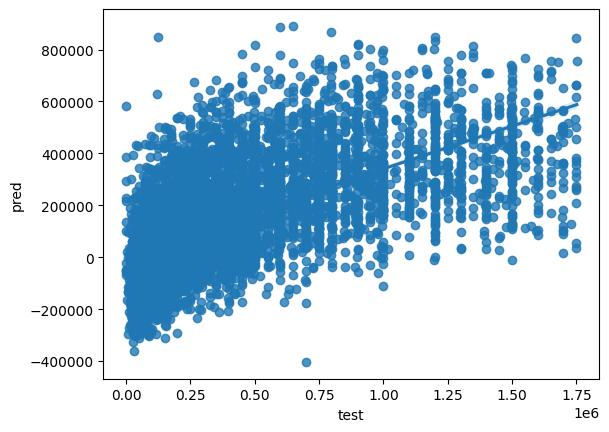

In [21]:
sns.regplot(data=dfr, y='pred', x='test')

### Save the model

In [24]:
joblib.dump((vect,regr),'data/model.sdgr.joblib')

['data/model.sdgr.joblib']